In [1]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def add_date_time(df):
    dts = []
    for idx in df.index:
        dts.append( datetime(
            df.loc[idx, 'year'],
            df.loc[idx, 'month'],
            df.loc[idx, 'day'],
            df.loc[idx, 'hour']-1, 
            0 # minutes
        ))
    df['date_time'] = dts
    return df

In [3]:
year = 2019
reg = 'ERCOT'
PATH = '../data/'
dPath = PATH+'ERCOT_mem_1998-2019.csv'

df = pd.read_csv(dPath, header=0)

df = df[ df['year'] == year ]
df = df.reset_index()
df = add_date_time(df)


solar_df = pd.read_csv(PATH+'20200624v4_ERCO_2018_mthd3_1990-2019_solar.csv', header=0)
solar_df['solar capacity'] = solar_df['s_cfs']
wind_df = pd.read_csv(PATH+'20200624v4_ERCO_2018_mthd3_1990-2019_wind.csv', header=0)
wind_df['wind capacity'] = wind_df['w_cfs']

dt_shifted = df['date_time'] - timedelta(hours=6)

index                       180687
year                          2019
month                            8
day                             12
hour                            22
demand (MW)                74665.6
date_time      2019-08-12 21:00:00
Name: 5373, dtype: object
15 0.45695403978755206
15 0.5379462406054825


<ipython-input-4-2c0e728f382d>:47: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(h_leg, order, prop={'size': 17}, loc='upper left', ncol=ncols)
<ipython-input-4-2c0e728f382d>:47: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(h_leg, order, prop={'size': 17}, loc='upper left', ncol=ncols)


15 0.45695403978755206
15 0.5379462406054825
15 0.45695403978755206
15 0.5379462406054825


<ipython-input-4-2c0e728f382d>:47: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(h_leg, order, prop={'size': 17}, loc='upper left', ncol=ncols)


15 0.45695403978755206
15 0.5379462406054825
15 0.45695403978755206
15 0.5379462406054825


<ipython-input-4-2c0e728f382d>:47: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(h_leg, order, prop={'size': 17}, loc='upper left', ncol=ncols)


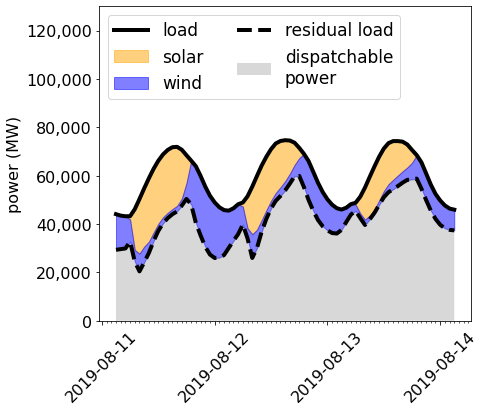

In [4]:
# Shows simplified, clean results     
def demand_plot3(df, dt_shifted, wind, solar, pct_wind, pct_solar, title, steps=1):
    plt.close()
    fig, ax = plt.subplots(figsize=(7,6))
    matplotlib.rcParams.update({'font.size': 16})
    #ax.set_xlabel('Hour')
    ax.set_ylabel('power (MW)')
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


    
    mean = np.mean(df['demand (MW)'])
    # Find % wind and solar
    wind_cap = (pct_wind/100.)*len(df.index)/np.sum(wind['wind capacity'])
    print(pct_wind, wind_cap)
    solar_cap = (pct_solar/100.)*len(df.index)/np.sum(solar['solar capacity'])
    print(pct_solar, solar_cap)
    
    ax.plot(dt_shifted, df['demand (MW)'], 'k-', label='load', linewidth=4.0)
    if steps > 1:
        ax.fill_between(dt_shifted,
                    df['demand (MW)']-solar['solar capacity']*solar_cap*mean, df['demand (MW)'],
                    color='orange', label='solar', alpha=0.5)
    if steps > 2:
        ax.fill_between(dt_shifted,
                    df['demand (MW)']-solar['solar capacity']*solar_cap*mean-wind['wind capacity']*wind_cap*mean,
                    df['demand (MW)']-solar['solar capacity']*solar_cap*mean,
                    color='blue', label='wind', alpha=0.5)
    if steps > 3:
        rl = df['demand (MW)']-wind['wind capacity']*wind_cap*mean-solar['solar capacity']*solar_cap*mean
        ax.plot(dt_shifted, rl,
                    'k--', label='residual load', linewidth=4.0)
        ax.fill_between(dt_shifted, np.zeros(len(dt_shifted)), rl, label='dispatchable\npower', facecolor='gray', alpha=0.3)
    


    # Reorder legend labels as I want
    handles, labels = ax.get_legend_handles_labels()
    order = ['load', 'solar', 'wind', 'residual load', 'dispatchable\npower']
    h_leg = [None for _ in range(len(order))]
    for h, l in zip(handles, labels):
        idx = order.index(l)
        h_leg[idx] = h
    
    #ax.set_xlim(dt_shifted.iloc[0, 'date_time'], dt_shifted.iloc[-1, 'date_time'])
    ncols = 1 if step in [1, 2] else 2
    plt.legend(h_leg, order, prop={'size': 17}, loc='upper left', ncol=ncols)
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.HourLocator())
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )
    #ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.set_ylim(0, 130000)
    plt.tight_layout()
    #plt.grid()
    plt.savefig(f"yr{year}_windGen{round(pct_wind,2)}_solarGen{round(pct_solar,2)}_step{steps}.pdf")
    return




# Index of max demand value
idxmax = df['demand (MW)'].idxmax()
print(df.loc[idxmax])
hours = 24*3
dem = df.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
dt = dt_shifted.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
wind = wind_df.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
solar = solar_df.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
wind_CF = np.mean(wind_df['wind capacity'])
solar_CF = np.mean(solar_df['solar capacity'])
#print(wind_CF, solar_CF)

wind_pct = 15
solar_pct = 15
for step in [1, 1, 2, 3, 4]:
    demand_plot3(dem, dt, wind, solar, wind_pct, solar_pct, reg, step)

In [ ]:
# Shows simplified, clean results     
def demand_plot3(df, dt_shifted, wind, solar, pct_wind, pct_solar, title, steps=1):
    plt.close()
    fig, ax = plt.subplots(figsize=(7,6))
    matplotlib.rcParams.update({'font.size': 16})
    #ax.set_xlabel('Hour')
    ax.set_ylabel('power (MW)')
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


    
    mean = np.mean(df['demand (MW)'])
    # Find % wind and solar
    wind_cap = (pct_wind/100.)*len(df.index)/np.sum(wind['wind capacity'])
    print(pct_wind, wind_cap)
    solar_cap = (pct_solar/100.)*len(df.index)/np.sum(solar['solar capacity'])
    print(pct_solar, solar_cap)
    
    p1 = ax.plot(dt_shifted, df['demand (MW)'], 'k-', label='load', linewidth=4.0)
    
    # For planning reserve margin example
    margin = 1.15
    uncert = 0.085
    if steps < 0:
        p2 = ax.plot(dt_shifted, [np.max(df['demand (MW)'])*margin for _ in range(len(dt_shifted.index))],
               'r-', linewidth=4.0, label='reserve\nmargin')
    
    
    if steps < -1:
        ax.fill_between(dt_shifted,
                    df['demand (MW)']*(1.-uncert), df['demand (MW)']*(1.+uncert),
                   color='gray', alpha=0.5, label='load\nuncertainty')
        p1u = ax.fill(np.NaN, np.NaN, 'gray', alpha=0.5)
        
        ax.fill_between(dt_shifted,
                    [np.max(df['demand (MW)'])*(margin-uncert) for _ in range(len(dt_shifted.index))], 
                    [np.max(df['demand (MW)'])*(margin+uncert) for _ in range(len(dt_shifted.index))],
                   color='red', alpha=0.2, label='reserve uncertainty')
        p2u = ax.fill(np.NaN, np.NaN, 'red', alpha=0.2)
        
    ncols=1
    if steps == 0:
        ax.legend([p1[0],], ['load',], prop={'size': 17}, loc='upper left', ncol=ncols)
    
    if steps == -1:
        ax.legend([p1[0], p2[0]], ['load', 'total capacity'], prop={'size': 17}, loc='upper left', ncol=ncols)
    
    if steps == -2:
        ax.legend([(p1u[0], p1[0]), (p2u[0], p2[0])], ['load + uncertainty', 'total capacity + uncertainty'], prop={'size': 17}, loc='upper left', ncol=ncols)
        
    
    
    

    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.HourLocator())
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )
    #ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.set_ylim(0, 140000)
    plt.tight_layout()
    #plt.grid()
    plt.savefig(f"yr{year}_windGen{round(pct_wind,2)}_solarGen{round(pct_solar,2)}_step{steps}.pdf")
    return




# Index of max demand value
idxmax = df['demand (MW)'].idxmax()
print(df.loc[idxmax])
hours = 24*3
dem = df.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
dt = dt_shifted.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
wind = wind_df.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
solar = solar_df.loc[int(idxmax - hours/2):int(idxmax + hours/2)]
wind_CF = np.mean(wind_df['wind capacity'])
solar_CF = np.mean(solar_df['solar capacity'])
#print(wind_CF, solar_CF)

wind_pct = 15
solar_pct = 15
for step in [0, -1, -2]:
    demand_plot3(dem, dt, wind, solar, wind_pct, solar_pct, reg, step)

In [ ]:
# Capacity dispatchable vs. non-dispatchable example     
def demand_capacity(df, dt_shifted, wind, solar, pct_wind, pct_solar, title, steps=1):
    plt.close()
    fig, ax = plt.subplots(figsize=(7,6))
    matplotlib.rcParams.update({'font.size': 16})
    #ax.set_xlabel('Hour')
    ax.set_ylabel('power (MW)')
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


    
    mean = np.mean(df['demand (MW)'])
    # Find % wind and solar
    wind_cap = (pct_wind/100.)*len(df.index)/np.sum(wind['wind capacity'])
    print(pct_wind, wind_cap)
    solar_cap = (pct_solar/100.)*len(df.index)/np.sum(solar['solar capacity'])
    print(pct_solar, solar_cap)
    
    p1 = ax.plot(dt_shifted, df['demand (MW)'], 'k-', label='load', linewidth=4.0)
    
    # For planning reserve margin example
    margin = 1.15
    uncert = 0.085
    disp = np.array([np.max(df['demand (MW)'])*margin for _ in range(len(dt_shifted.index))])
    if steps > 0:
        p2 = ax.plot(dt_shifted, disp,
               'r-', linewidth=4.0, label='dispatchable capacity')
    
    if steps > 1:
        p3 = ax.plot(dt_shifted, disp+solar['solar capacity']*solar_cap*mean,
               'r--', linewidth=4.0, label='non-dispatchable capacity')
    
    """
    if steps > 1:
        ax.fill_between(dt_shifted,
                    df['demand (MW)']-solar['solar capacity']*solar_cap*mean, df['demand (MW)'],
                    color='orange', label='solar', alpha=0.5)
    if steps > 2:
        ax.fill_between(dt_shifted,
                    df['demand (MW)']-solar['solar capacity']*solar_cap*mean-wind['wind capacity']*wind_cap*mean,
                    df['demand (MW)']-solar['solar capacity']*solar_cap*mean,
                    color='blue', label='wind', alpha=0.5)
    if steps > 3:
        ax.plot(dt_shifted, df['demand (MW)']-wind['wind capacity']*wind_cap*mean-solar['solar capacity']*solar_cap*mean,
                    'k--', label='residual load', linewidth=4.0)
    """
    
    ncols=1
    if steps == 1:
        ax.legend([p1[0], p2[0]], ['load', 'dispatchable capacity'], prop={'size': 17}, loc='upper left', ncol=ncols)
    if steps == 2:
        ax.legend([p1[0], p2[0], p3[0]], ['load', 'dispatchable capacity', 'non-dispatchable capacity'], prop={'size': 17}, loc='upper left', ncol=ncols)
    
    
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.HourLocator())
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )
    #ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.set_ylim(0, 160000)
    plt.tight_layout()
    #plt.grid()
    plt.savefig(f"yr{year}_cap_windGen{round(pct_wind,2)}_solarGen{round(pct_solar,2)}_step{steps}.pdf")
    return

wind_pct = 15
solar_pct = 10
for step in [1, 1, 2]:
    demand_capacity(dem, dt, wind, solar, wind_pct, solar_pct, reg, step)

In [ ]:
# Capacity dispatchable vs. non-dispatchable example     
def demand_rl_margin(df, dt_shifted, wind, solar, pct_wind, pct_solar, title, steps=1):
    plt.close()
    fig, ax = plt.subplots(figsize=(7,6))
    matplotlib.rcParams.update({'font.size': 16})
    #ax.set_xlabel('Hour')
    ax.set_ylabel('power (MW)')
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


    
    mean = np.mean(df['demand (MW)'])
    # Find % wind and solar
    wind_cap = (pct_wind/100.)*len(df.index)/np.sum(wind['wind capacity'])
    print(pct_wind, wind_cap)
    solar_cap = (pct_solar/100.)*len(df.index)/np.sum(solar['solar capacity'])
    print(pct_solar, solar_cap)
    
    p1 = ax.plot(dt_shifted, df['demand (MW)'], 'k-', label='load', linewidth=4.0)
    
    # For planning reserve margin example
    margin = 1.15
    uncert = 0.085
    disp = np.array([np.max(df['demand (MW)'])*margin for _ in range(len(dt_shifted.index))])

    p2 = ax.plot(dt_shifted, disp,
            'r-', linewidth=4.0, label='dispatchable capacity')
    
    ax.fill_between(dt_shifted,
                [np.max(df['demand (MW)'])*(margin-uncert) for _ in range(len(dt_shifted.index))], 
                [np.max(df['demand (MW)'])*(margin+uncert) for _ in range(len(dt_shifted.index))],
                color='red', alpha=0.2, label='dispatchable uncertainty')
    p2u = ax.fill(np.NaN, np.NaN, 'red', alpha=0.2)
    
    rl = df['demand (MW)']-solar['solar capacity']*solar_cap*mean
    p3 = ax.plot(dt_shifted, rl,
            'k--', linewidth=4.0, label='residual load')
    
    ax.fill_between(dt_shifted,
            rl*(1.-uncert), rl*(1.+uncert),
            color='gray', alpha=0.5, label='residual load\nuncertainty')
    p3u = ax.fill(np.NaN, np.NaN, 'gray', alpha=0.5)
    
    ncols=1
    ax.legend([p1[0], (p3[0], p3u[0]), (p2[0], p2u[0])], ['load', 'residual load + uncertainty', 'dispatchable + uncertainty'], prop={'size': 17}, loc='upper left', ncol=ncols)
    
    
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.HourLocator())
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )
    #ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.set_ylim(0, 160000)
    plt.tight_layout()
    #plt.grid()
    plt.savefig(f"yr{year}_RL_Margin_windGen{round(pct_wind,2)}_solarGen{round(pct_solar,2)}_step{steps}.pdf")
    return

wind_pct = 15
solar_pct = 10
for step in [1, 1]:
    demand_rl_margin(dem, dt, wind, solar, wind_pct, solar_pct, reg, step)